In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [13]:
data = pd.read_csv('Mall_Customers.csv')

data.drop(columns=['CustomerID'], inplace=True)
data.head()

#Convert categorical (Gender) → numeric
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})
data.head()
#Standardize features
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


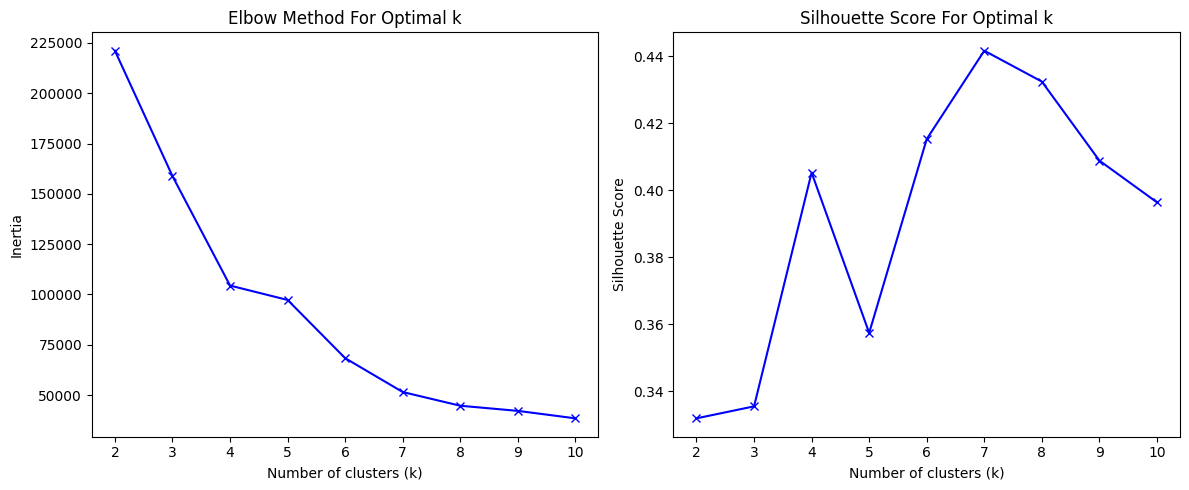

In [14]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.tight_layout()
plt.show()


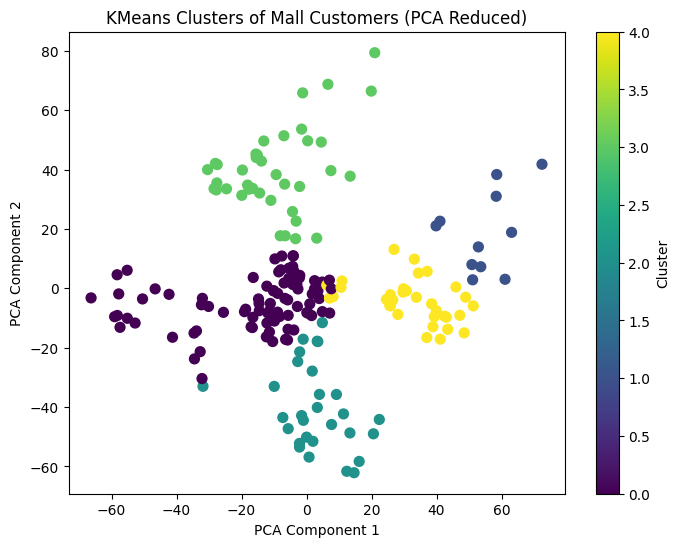

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)
data['Cluster'] = kmeans.labels_
data.head()

#PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop(columns=['Cluster']))
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clusters of Mall Customers (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()